In [30]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics


***CREATING THE DATAFRAME***

In [31]:
car_data = pd.read_csv('D:\\python_ai codes\\car_data.csv')
car_data.head()
car_data.info()
car_data.isnull().sum()
car_data.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


CHECKING THE COUNTS OF  TYPES IN FUEL_TYPE , SELLER_TYPE , TRANMISSION

In [32]:
car_data.describe()
car_data.columns
print(car_data['Fuel_Type'].value_counts())
print(car_data['Seller_Type'].value_counts())
print(car_data['Transmission'].value_counts())
fuel_type = car_data['Fuel_Type']
seller_type = car_data['Seller_Type']
transmission_type = car_data['Transmission']
selling_price = car_data['Selling_Price']


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


PLOTTING GRAPHS AGAINST SELLING PRICE Vs. values of fuel_type , tranmission , seller_type to give values for prediction model

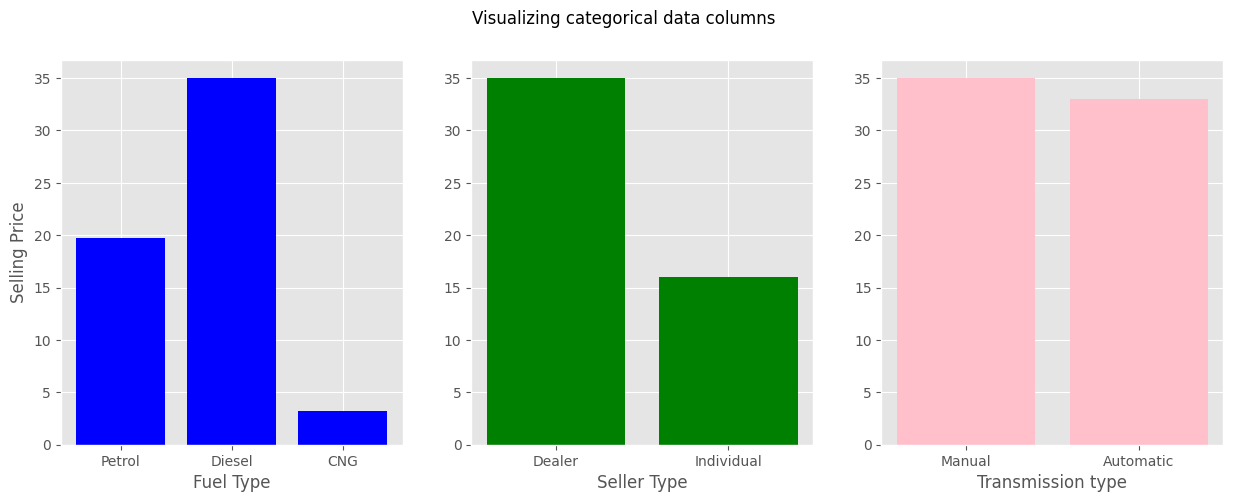

In [56]:
from matplotlib import style

style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price, color='blue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color='green')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color='pink')
plt.xlabel('Transmission type')
plt.show()

plotting graphs for mean values to check the same

<AxesSubplot: xlabel='Transmission', ylabel='Selling_Price'>

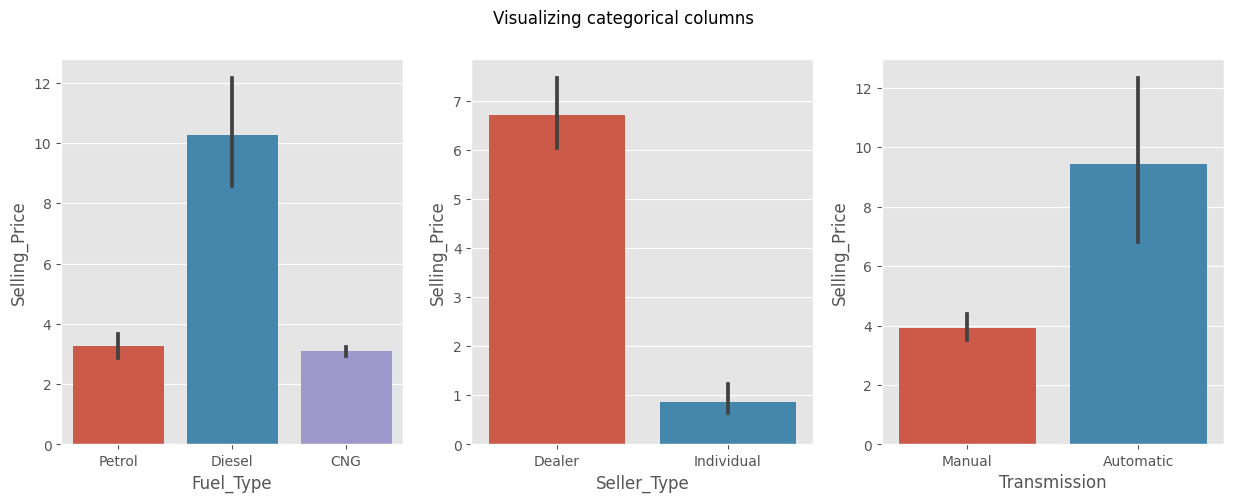

In [57]:
fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=False)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])

**USE THIS CODE TO CHECK ABOVE 2 GRAPHS IF THEY SHOW TRUE VALUES AGAINST THE DATAFRAME***

In [33]:
petrol_data = car_data.groupby('Fuel_Type').get_group('Diesel')
petrol_data.describe()

#seller_data = car_data.groupby('seller_type').get_group('Dealer')
#seller_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2014.000000,10.278500,15.814500,50369.916667,0.016667
std,2.201694,7.185159,13.484289,30021.446979,0.129099
min,2005.000000,3.100000,5.700000,2071.000000,0.000000
25%,2013.000000,5.137500,8.912500,38750.000000,0.000000
50%,2014.000000,7.750000,10.585000,45000.000000,0.000000
75%,2015.000000,12.600000,17.010000,59250.000000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,1.000000


MANUALLY ENCODING THE COLUMNS TO RETURN INTEGER VALUES

In [58]:
#manual encoding
car_data.replace({'Fuel_Type':{'Petrol':1, 'Diesel':0, 'CNG':2}}, inplace=True)
car_data.replace({'Transmission':{'Manual':1, 'Automatic':0}}, inplace=True)
car_data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
#car_data.replace({'seller_type':{'Individual':0, 'Dealer':1, 'Trustmark Dealer':2 }}, inplace=True)
#one hot encoding
#car_data = pd.get_dummies(car_data, columns=['Transmission','Seller_Type'], drop_first=True)
car_data = car_data.dropna(axis=0)
car_data.head(100)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
95,corolla altis,2012,5.85,18.61,72000,0,0,0,0
96,innova,2016,20.75,25.39,29000,1,0,1,0
97,corolla altis,2017,17.00,18.64,8700,0,0,0,0
98,corolla altis,2013,7.05,18.61,45000,0,0,0,0


In [59]:
print(car_data['Transmission'].min())
print(car_data['Transmission'].max())
#car_data['Seller_Type'].min()
#car_data['Seller_Type'].max()



0
1


In [61]:
print(car_data.head())
#print(car_data[:].value_counts)

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Owner  \
0     ritz  2014           3.35           5.59       27000          0      0   
1      sx4  2013           4.75           9.54       43000          1      0   
2     ciaz  2017           7.25           9.85        6900          0      0   
3  wagon r  2011           2.85           4.15        5200          0      0   
4    swift  2014           4.60           6.87       42450          1      0   

   Transmission_Manual  Seller_Type_Individual  
0                    1                       0  
1                    1                       0  
2                    1                       0  
3                    1                       0  
4                    1                       0  


PLOTTING THE HEATMAP FOR ALL COLUMNS

C:\Users\Abhishek Natani\AppData\Local\Temp\ipykernel_6364\3492936538.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_data.corr(), annot=True)


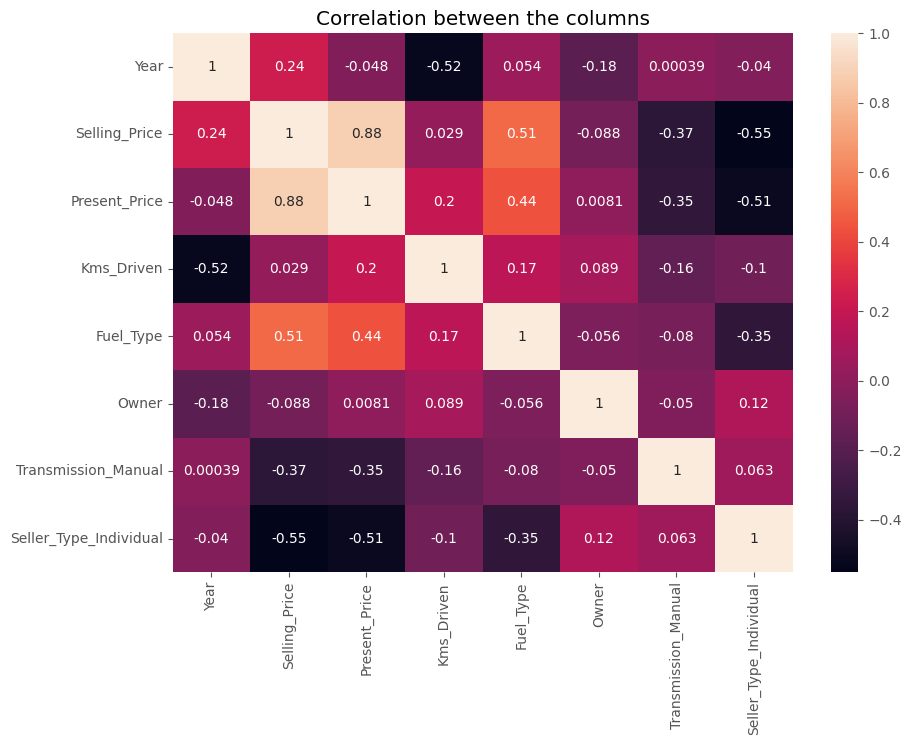

In [62]:
plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

SHOWING THE CORRELATION BETWEEN HOW THE PRICE IS DIFFERING WITH PRESENT PRICE (2nd hand sold cars)

<AxesSubplot: title={'center': 'Correlation between present price and selling price'}, xlabel='Present_Price', ylabel='Selling_Price'>

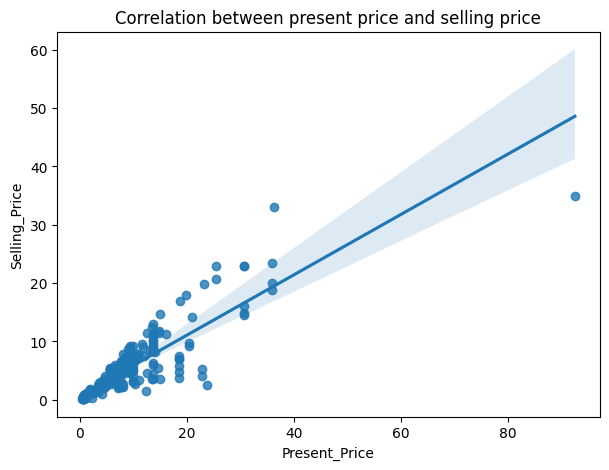

In [8]:
fig=plt.figure(figsize=(7,5))
plt.title('Correlation between present price and selling price')
sns.regplot(x='Present_Price', y='Selling_Price', data=car_data)

selection of columns from dataframe to use in train-test liner model

In [60]:
X = car_data.drop(['Car_Name','Selling_Price'], axis=1)
y = car_data['Selling_Price']
#X = X.dropna(axis=0) 


print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)

Shape of X is:  (301, 7)
Shape of y is:  (301,)
X_test shape: (91, 7)
X_train shape: (210, 7)
y_test shape:  (91,)
y_train shape: (210,)


fitting the model for linear regression

In [61]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([ 2.84503948,  8.17433042,  6.15503229, -1.53474297,  9.10478102,
        7.12513416,  1.41208877,  0.85727713,  1.42824591,  7.18732696,
        8.77738476,  0.64604862,  8.19199294,  3.27496701,  6.58156734,
        3.12524913,  0.47776322, 10.71519858,  1.81845542,  2.3948969 ,
        0.40800604,  7.78763597,  6.25976337,  2.59710749,  0.8401473 ,
        3.68243396,  5.30447357,  2.81900104,  2.20840021,  1.82500826,
        0.41732684,  8.85691122, -0.6636885 ,  2.2707602 ,  8.2948583 ,
        4.51208942,  7.29749227,  7.54243321,  2.9482584 ,  7.9275823 ,
        3.90745022,  4.17258578,  4.31519575,  0.69858995,  7.02594603,
        0.53398622,  7.32449179, 11.09649499,  3.13148761,  5.06495644,
        6.60928574,  2.2345092 , 20.15115757, 16.47662698,  7.25913588,
        9.54127202,  4.43952683,  8.67649783,  1.75283042,  7.41244863,
        0.27553659, -2.53278607,  2.01366813, -1.56020807,  4.79226982,
        1.86019863, 19.80408464, 17.88217176,  5.42372796, -0.54

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))
# y_test contains the actual values of your test dataset
# y_pred contains the predicted values of your model for your test dataset



MAE:  1.2581404706471264
MSE:  3.4932860262264334
R2 score:  0.8294933369777489


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))
# y_test contains the actual values of your test dataset
# y_pred contains the predicted values of your model for your test dataset



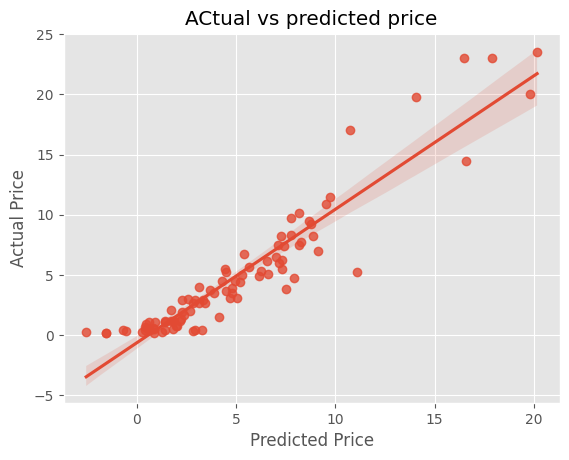

In [69]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()

In [146]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [166]:
df= pd.read_csv('D:\\python_ai codes\\Car_Reviews_Database.csv')
df.head()


,Year,review_sentiment,Model,Review
0,2009,neutral,Honda,Although�arguably the first-generation Insight...
1,2009,positive,Honda,2009 Honda Accord EX-L 4 : This car is very c...
2,2010,neutral,Honda,I have owed and driven Honda products for 20 y...
3,2010,negative,Honda,"Honda Accord Euro L : The seats are average, b..."
4,2011,negative,Honda,Honda HR-V: Continuous variable transmission ...


In [167]:
print("Shape of the dataframe is",df.shape)
print("The number of nulls in each column are \n", df.isna().sum())
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Shape of the dataframe is (279, 4)
The number of nulls in each column are 
 Year                 0
review_sentiment     0
Model                0
Review              44
dtype: int64
Percentage null or na values in df


Year                 0.00
review_sentiment     0.00
Model                0.00
Review              15.77
dtype: float64

In [168]:
#print("Total number of reviews \n ",df.groupby('Model')['review_sentiment'].count().sort_values(ascending=False))
print("Total number of reviews \n ",df.groupby('Model')['review_sentiment'].value_counts(ascending=False))
Model_1= ['Honda','Hyundai','GMC','Ford','Audi','Bentley', 'Buick','Cadillac','Chrysler','Dodge','Fiat','Ferrari','Acura','Alpha','BMW','Chevrolet','Genesis']



Total number of reviews 
  Model      review_sentiment
Acura      negative             8
           positive             2
           neutral              1
Alfa       positive             6
           negative             3
           neutral              2
Audi       neutral              6
           negative             5
           positive             1
BMW        negative            11
           positive             7
           neutral              2
Bentley    negative             8
           neutral              2
           positive             1
Buick      positive            10
           negative             6
           neutral              4
Cadillac   negative            10
           neutral              5
           positive             5
Chevrolet  positive            10
           negative             8
           neutral              2
Chrysler   neutral              5
           negative             3
           positive             3
Dodge      negative        

positive    12
negative     6
neutral      4
Name: review_sentiment, dtype: int64
negative    10
positive     6
neutral      6
Name: review_sentiment, dtype: int64
neutral     14
positive     6
negative     2
Name: review_sentiment, dtype: int64
neutral     8
negative    8
positive    6
Name: review_sentiment, dtype: int64
neutral     6
negative    5
positive    1
Name: review_sentiment, dtype: int64
negative    8
neutral     2
positive    1
Name: review_sentiment, dtype: int64
positive    10
negative     6
neutral      4
Name: review_sentiment, dtype: int64
negative    10
positive     5
neutral      5
Name: review_sentiment, dtype: int64
neutral     5
negative    3
positive    3
Name: review_sentiment, dtype: int64
negative    8
positive    2
neutral     1
Name: review_sentiment, dtype: int64
negative    5
neutral     5
positive    1
Name: review_sentiment, dtype: int64
neutral     4
negative    4
positive    3
Name: review_sentiment, dtype: int64
negative    8
positive    2
neutral  

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (0,).

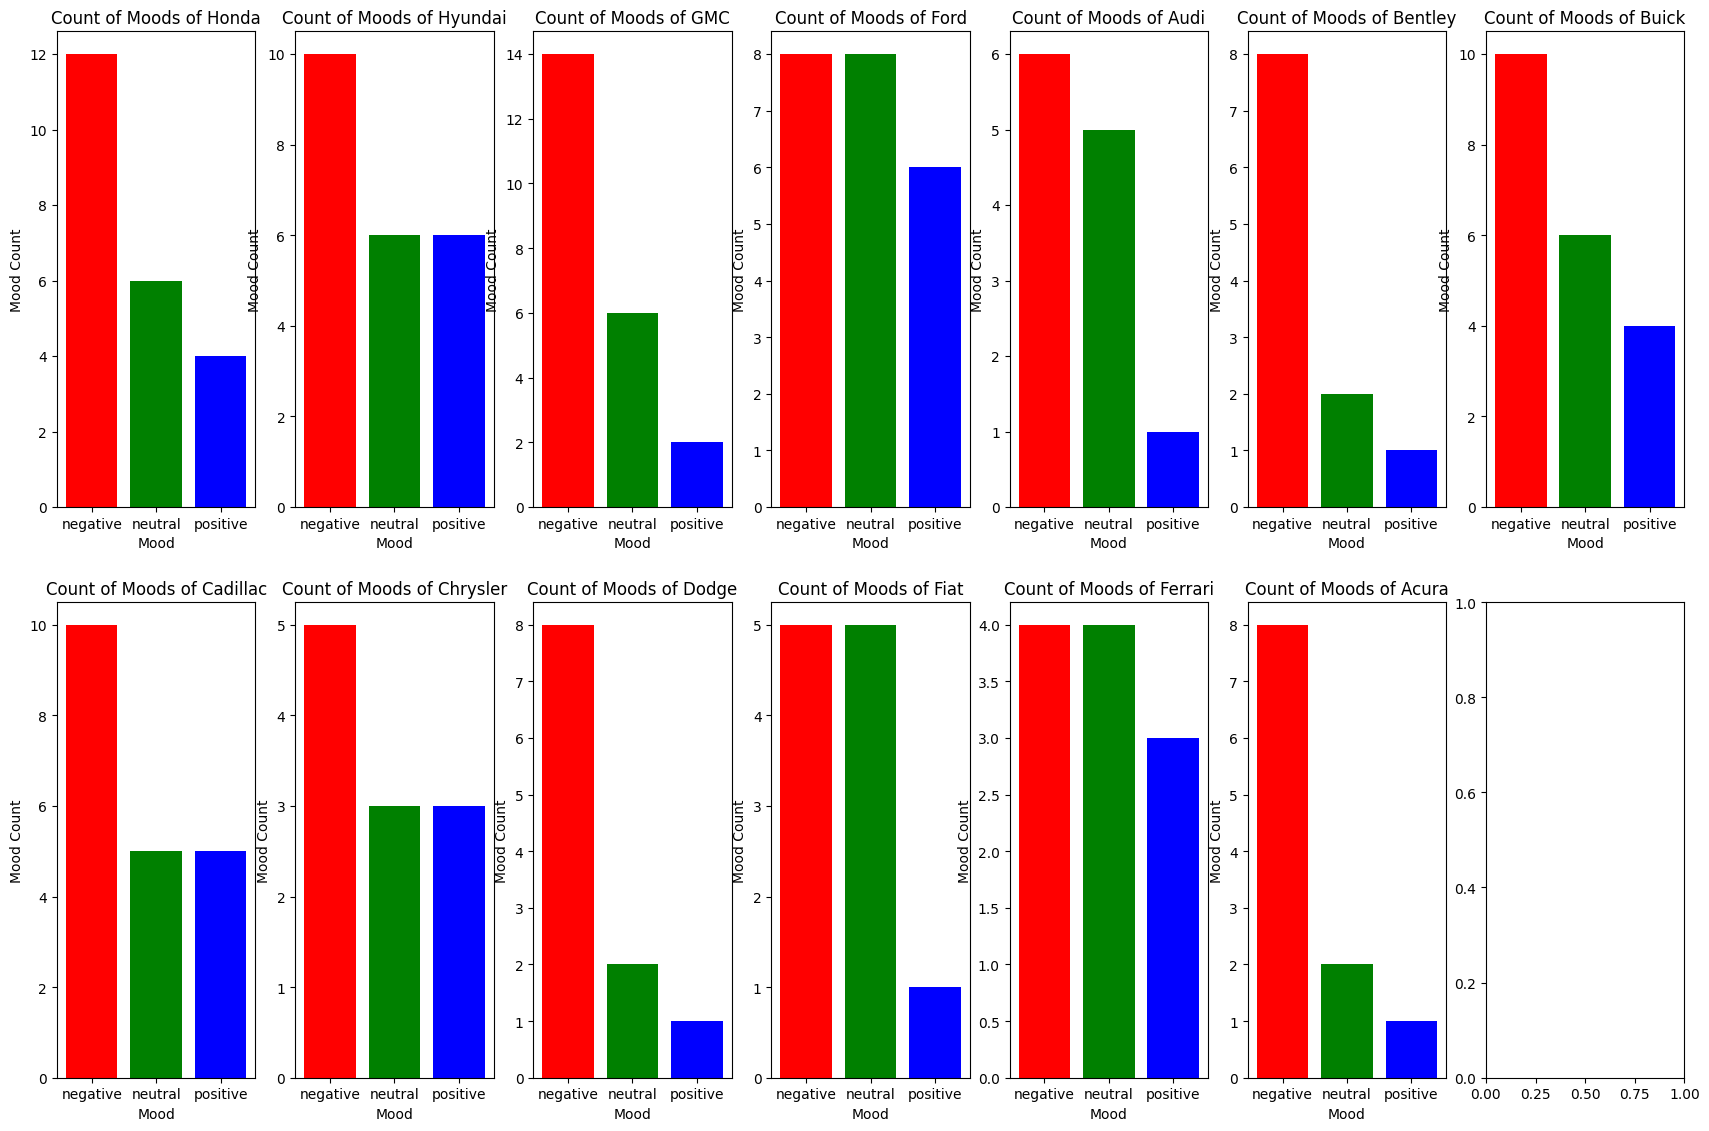

In [169]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(21, 21))
for i in Model_1:
    indices= Model_1.index(i)
    plt.subplot(3, 7,indices+1)
    new_df = df
    new_df=df[df['Model']==i]
    #new_df['review_sentiment'] = new_df['review_sentiment'].astype(str)
    count=new_df['review_sentiment'].value_counts()
    print(count)
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)
plt.show()

DRAWING BOARD FOR PRACTICE TO RESOLVE ABOVE ISSUE

In [170]:
# import matplotlib.pyplot as plt
# plt.figure(1,figsize=(21, 21))
# for i in Model_1:
#     indices= Model_1.index(i)
#     plt.subplot(3,6,indices+1)
#     new_df=df[df['Model']==i]
#     #new_df = new_df[np.isfinite(new_df['review_sentiment'])]
#     count = new_df['review_sentiment'].value_counts()
#     plt.bar(count.index, count, color=['red', 'green', 'blue'])
#     plt.xticks(count.index, count)
#     # count=new_df['review_sentiment'].value_counts()
#     # plt.xticks(count.index,['negative','neutral','positive'])
#     plt.ylabel('Mood Count')
#     plt.xlabel('Mood')
#     plt.title('Count of Moods of '+i)
# plt.show()
    